In [42]:
import pandas as pd
from sqlalchemy import create_engine
csv_database = create_engine('sqlite:///csv_database.db')


import pickle
geolocations = pickle.load( open( "cities.pkl", "rb" ) )
cleangeolocations = pickle.load( open( "citiesnopunc.pkl", "rb" ) )

In [177]:
import string as stringlib

def dfgen(month,year):
    sqlstring='SELECT [Town/City], Price, strftime("%Y",DateofTransfer)as Year, strftime("%m",DateofTransfer)as Month FROM "table"  WHERE Cast(Year as int)== '+str(year)+ ' AND Cast(Month as int)== '+str(month)+' LIMIT 100' 
    return pd.read_sql_query(sqlstring, csv_database)
    
def clean_string(string):
 for char in stringlib.punctuation:
     string = string.replace(char,'').replace(' ', '')
 return string.upper()

In [96]:
def cit_dist(df): 
    return (list(map(clean_string,df['Town/City'].values)), list(map(clean_string,df['District'].values)))

def cleangeolocationslsp(city,district):
    if city != 'LONDON':
        return cleangeolocations.get(city)
    else:
        return cleangeolocations.get(district)

In [50]:

testdf=dfgen(11,2012)


In [187]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors

#Input a dataframe of format: Town/City	Price	Year	Month	
def plotgen(df):
    locations=df.iloc[:,0]
    cleanlocations=locations.map(clean_string)

    cleanplotdata=cleanlocations.map(cleangeolocations).tolist()
    cleanfplotdata=list(filter(lambda x:type(x)==tuple,cleanplotdata))
    mydate=df.iloc[0,3] +'/'+ df.iloc[0,2] 
    print(mydate+' '+str(len(cleanplotdata))+' entries ' +str(len(cleanfplotdata)-len(cleanplotdata)) +' failed geolocations')
    y=[cpd[0] for cpd in cleanplotdata]
    x=[cpd[1] for cpd in cleanplotdata]
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])
    cmap = plt.cm.jet
    norm = matplotlib.colors.LogNorm(vmin=50000,vmax=740000)


    fig = plt.figure(figsize=(10,20))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    plt.figure(figsize=(12,6))

    ax.set_extent([ -7.781181, 2.514105,48.467529, 57.805202,])
    ax.add_feature(land_50m)
    ax.scatter(x,y,color=cmap(norm(df.Price.values)),s=1.5, zorder=10)
    ax.text( 0.3,57, mydate, fontsize=15)

    return ax

11/1996 100 entries 0 failed geolocations


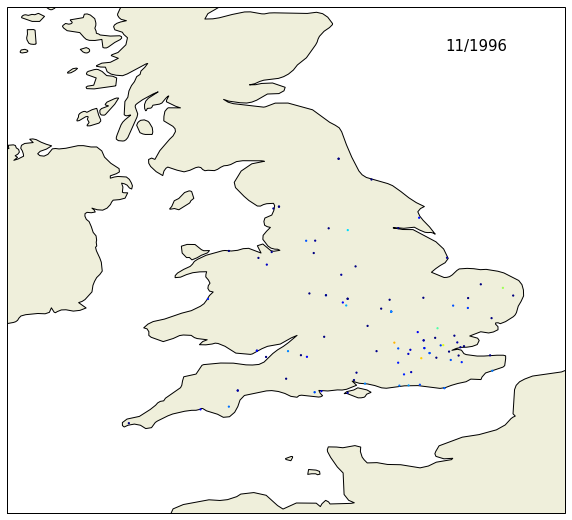

<Figure size 864x432 with 0 Axes>

In [188]:
for i in range(1996,1997):
    plotgen(dfgen(11,i))


In [82]:
type(testdf.iloc[0,3])


str

In [165]:
geolocations.get('GRAVESEND')


(51.44206, 0.37106)